# Decison Tree Classifier
## Titanic Survival Prediction Model
Dataset: [titanic_train.csv](https://www.kaggle.com/datasets/rashigoel/titanic-machine-learning-from-disaster?select=train.csv)

---


In [40]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# importing dataset
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.shape #rows and col

(891, 12)

By seeing dataset, we notice that some features are not useful for us to make machine learning model.
lets drop that feature and reduce dimentions on dataset
* PassengerId
* Name
* SibSp
* Parch
* Ticket
* Cabin
* Embarked

In [43]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns', inplace=True)

In [44]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


### Handling Null Values

In [45]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

our dataset contain Null values in **Age** field. While handling this we will fill null value as mean of age

In [46]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [47]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


As ML model work on numerical data, we need to encode **Sex** field as it is text.<br>
We will use **LabelEncoder** method

In [48]:
from sklearn.preprocessing import LabelEncoder
l_sex = LabelEncoder()

In [49]:
df['l_sex'] = l_sex.fit_transform(df['Sex'])

In [50]:
df.head()

,Survived,Pclass,Sex,Age,Fare,l_sex
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [51]:
# dropping Sex column as we have new encoded
df.drop(['Sex'], axis='columns', inplace=True)
df.head()

,Survived,Pclass,Age,Fare,l_sex
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


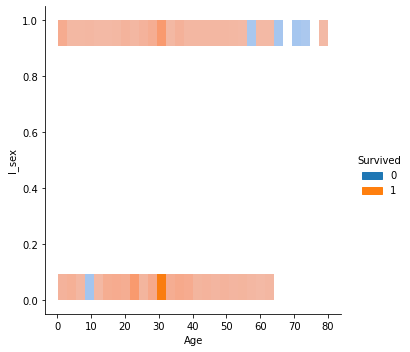

In [52]:
sns.displot(data=df, x='Age', y='l_sex', hue='Survived')

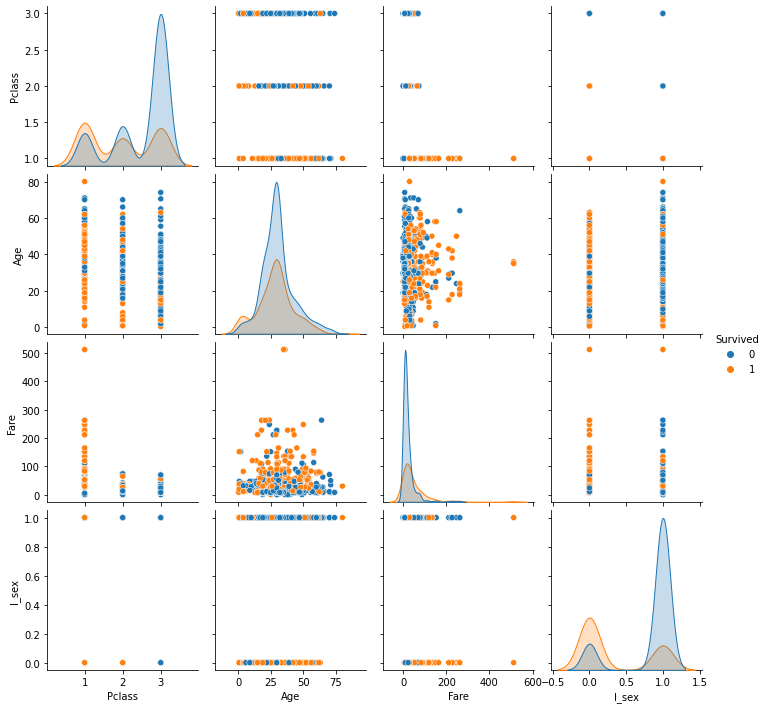

In [53]:
sns.pairplot(data=df, hue='Survived')

lets start
### Building ML Model
We will do following steps:
* Splitting our data into train and test
* building Decision tree
* checking metrics such as score and confusion matrix
* checking test predictions

In [54]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [56]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [57]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
y_pred = model.predict(X_test)

### Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
matrix = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

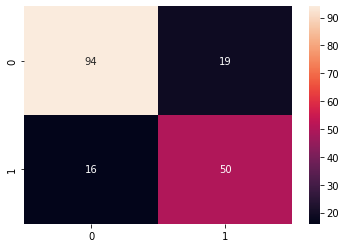

In [64]:
sns.heatmap(matrix, annot=True)

In [67]:
# model accuracy 
accuracy_score(y_test, y_pred)

0.8044692737430168

In [71]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       113
           1       0.72      0.76      0.74        66

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.81       179



## Conclusion
* Our model scores 80.44% with test split of dataset.